In [1]:
import numpy as np
import cv2
from copy import deepcopy
import matplotlib.pyplot as plt
from PIL import Image
#import pytesseract as tess


In [2]:
def show(img):
    cv2.imshow("Input",img)
    cv2.waitKey(0); 
    cv2.destroyAllWindows()

In [49]:
img=cv2.imread('8.png')
show(img)


In [4]:
#for understanding the image pixel format of rgb image 
print(len(img))
print(len(img[0]))
print(len(img[0][0]))


588
1063
3


In [5]:
#for color IMAGE


#blurring to remove high frequency component
imgBlurred = cv2.GaussianBlur(img, (5,5), 0)
show(imgBlurred)

#color to greyscale image
gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY)
show(gray)

#sobel edge detection 
sobelx = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=3)
show(sobelx)



In [6]:

# perform the canny edge detector to detect image edges
edges = cv2.Canny(gray, threshold1=30, threshold2=100)
show(sobelx)


In [7]:
#understanding the image pixel format
#here image is not in [r,g,b] rgb format , thats why dimension are 277*500
#if rgb color then dimension present the 277*500*3
#note  the dimensioin will remain 277*500 in whole remaing process

print(len(gray))
print(len(gray[0]))

588
1063


In [8]:
#otsu thresolding
ret2,threshold_img = cv2.threshold(sobelx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(threshold_img)


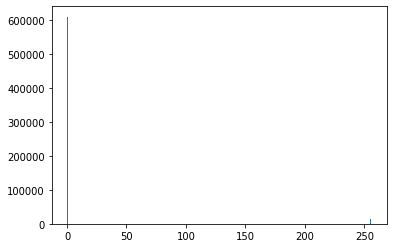

In [9]:
#biomodal image so better to use Otsu Thresolding
plt.hist(threshold_img.ravel(),256,[0,256]); plt.show()

In [10]:
morph_img_threshold = threshold_img.copy()

In [22]:
# rectangular kernel for morphological operation
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(20, 10))  #(20,10)

#morphological operation(dilation)
cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)

show(morph_img_threshold)

In [23]:
for i in range(0,len(morph_img_threshold)):
    print(morph_img_threshold[i])

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

In [24]:
#finding contours is like finding white object from black background.
#contours => (x,y) corrdinates of object

#Contour Approximation Method 
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html
# cv2.CHAIN_APPROX_NONE -all the boundary points are stored
#cv2.CHAIN_APPROX_SIMPLE -just two end points of that line , saving the memory

contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)

In [25]:
# for contour dimension


# n*m*1*2  
# n is number of object , m for no pair of x,y in paticular object , 1 is unncessary [[x,y]] instead of [x,y], 2 is (x,y)

print(len(contours))            #  n 
print(len(contours[0]))         #  m for first object

#extra [0] because in contours is (x,y) present in [[x,y]] instead of only [x,y]
print(len(contours[0][0][0]))   # x,y


87
38
2


In [15]:
#print(contours)



In [26]:
#Understanding the coordinates of contour

#Dimesion of morph_img_threshold is 277*500
# contours[0][0][0] => [465,275]  
# row is y coordinates and column in x coordinate

print(contours[0][0][0])
#checking the value 255 where ever their is object
print(morph_img_threshold[274][464])

[409 532]
0


In [27]:
newImg = img.copy()

In [44]:
#drawing contours on original colored image
# 2nd para is contour list to draw on image
# 3rd para is -1 , indicates draw all contours in list
#4rth para is color of contour
#5th para is thickness 
cv2.drawContours(newImg, contours, -1, (255,0,0), 1)
show(newImg)

In [29]:
contours[10]

array([[[549, 411]],

       [[548, 412]],

       [[547, 413]],

       [[547, 414]],

       [[547, 415]],

       [[547, 416]],

       [[547, 417]],

       [[547, 418]],

       [[547, 419]],

       [[547, 420]],

       [[547, 421]],

       [[547, 422]],

       [[547, 423]],

       [[547, 424]],

       [[547, 425]],

       [[547, 426]],

       [[547, 427]],

       [[547, 428]],

       [[547, 429]],

       [[547, 430]],

       [[547, 431]],

       [[547, 432]],

       [[547, 433]],

       [[547, 434]],

       [[547, 435]],

       [[547, 436]],

       [[547, 437]],

       [[547, 438]],

       [[547, 439]],

       [[547, 440]],

       [[547, 441]],

       [[547, 442]],

       [[547, 443]],

       [[547, 444]],

       [[547, 445]],

       [[547, 446]],

       [[547, 447]],

       [[547, 448]],

       [[548, 449]],

       [[548, 450]],

       [[549, 451]],

       [[549, 452]],

       [[550, 452]],

       [[551, 452]],

       [[552, 452]],

       [[5

In [48]:
len(contours[10])

381

In [53]:

# i is count index, cnt is coordinates of 1 whole object
for i,cnt  in enumerate(contours):
    
    print(cnt)
    
    if(len(cnt)>200):
            print(len(cnt))

    
        #print(i)
        #objectArea=cv2.minAreaRect(cnt)
    
        #print(objectArea)
    
        #validateRotationAndRatio(objectArea)
    
    
    

[[[409 532]]

 [[409 533]]

 [[409 534]]

 [[409 535]]

 [[409 536]]

 [[408 537]]

 [[408 538]]

 [[408 539]]

 [[408 540]]

 [[408 541]]

 [[407 542]]

 [[407 543]]

 [[407 544]]

 [[407 545]]

 [[407 546]]

 [[406 547]]

 [[406 548]]

 [[406 549]]

 [[406 550]]

 [[406 551]]

 [[407 550]]

 [[407 549]]

 [[407 548]]

 [[407 547]]

 [[407 546]]

 [[408 545]]

 [[408 544]]

 [[408 543]]

 [[408 542]]

 [[408 541]]

 [[408 540]]

 [[408 539]]

 [[408 538]]

 [[408 537]]

 [[409 536]]

 [[409 535]]

 [[409 534]]

 [[409 533]]]


In [54]:
#contour approximation  strategy -Ramer–Douglas–Peucker algorithm
# https://www.youtube.com/watch?v=nSYw9GrakjY

'''

cnt=contours[10]
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

'''


In [56]:
# testing for given number plate 

cnt=contours[10]
cv2.drawContours(newImg,cnt, -1, (0,0,0), 1)
show(newImg)
